### Submitted by: <br>
Abhishek Subramanian Iyer - 2724035 <br>
Venkat Mohit Sornapudi - 2721697

In [1]:
import numpy as n
import pandas as pd
from math import exp
import matplotlib.pyplot as plt
from pylab import meshgrid,cm

# Part A

In [2]:
def when_price_not_down(vals_to_compare, optimal_policy,state,time):
    optimal_class = n.argmax(vals_to_compare)
    if optimal_class > optimal_policy[state,time+1]:
        vals_to_compare[optimal_class]=-1
        return when_price_not_down(vals_to_compare, optimal_policy,state,time)
    else:
        return vals_to_compare

In [8]:
def revenue_mgmt(f,u,v,T,C, price_not_down):
    value_func = n.zeros((C+1,T+1))
    optimal_policy = n.full((C+1,T+1), None)
    
    for time in reversed(range(T)):
        for state in range(1,C+1):
            vals_to_compare = []
            for k in range(len(f)):
                acceptance_prob = 0
                for i in range(k+1):
                    acceptance_prob += u[i]*exp(v[i]*time)
                vals_to_compare.append(acceptance_prob*(f[k]+value_func[state-1,time+1])+
                                       (1-acceptance_prob)*value_func[state,time+1])
            
            if price_not_down and time != T-1:
                vals_to_compare = when_price_not_down(vals_to_compare, optimal_policy,state,time)
                
            optimal_class = n.argmax(vals_to_compare)

            optimal_policy[state,time] = optimal_class
            value_func[state,time] = vals_to_compare[optimal_class]
            
    return value_func, optimal_policy

In [9]:
f = n.array([500,300,200])
C = 100
T = 600
u = n.array([0.001,0.015,0.05])
v = n.array([0.01,0.005,0.0025])

In [10]:
value_func, optimal_policy = revenue_mgmt(f,u,v,T,C, price_not_down=False)
print("Expected Profit is : ",n.max(value_func))

Expected Profit is :  30318.083973328783


In [11]:
value_func_df = pd.DataFrame(value_func)
value_func_df

,0,1,2,3,4,5,6,7,8,9,...,591,592,593,594,595,596,597,598,599,600
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,493.824694,490.218017,484.413376,475.015248,459.706243,434.614238,393.228539,324.531707,209.758502,0.0
2,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,953.007387,931.274579,899.741947,854.355080,789.802844,699.624902,577.084127,417.876184,209.758502,0.0
3,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,...,1325.854038,1264.283341,1183.902026,1081.125478,953.261768,799.844831,624.367145,417.876184,209.758502,0.0
4,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,1573.682518,1462.362414,1330.900517,1180.024618,1012.602935,829.245358,624.367145,417.876184,209.758502,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,29799.627936,29795.239298,29790.829803,29786.399326,29781.947745,29777.474934,29772.980766,29768.465116,29763.927855,29759.368854,...,1829.925286,1632.905687,1434.341300,1234.218781,1032.524664,829.245358,624.367145,417.876184,209.758502,0.0
97,29931.655630,29927.162565,29922.648237,29918.112520,29913.555287,29908.976411,29904.375765,29899.753220,29895.108646,29890.441911,...,1829.925286,1632.905687,1434.341300,1234.218781,1032.524664,829.245358,624.367145,417.876184,209.758502,0.0
98,30062.085414,30057.486814,30052.866540,30048.224465,30043.560461,30038.874398,30034.166147,30029.435576,30024.682554,30019.906948,...,1829.925286,1632.905687,1434.341300,1234.218781,1032.524664,829.245358,624.367145,417.876184,209.758502,0.0
99,30190.900474,30186.195230,30181.467898,30176.718348,30171.946452,30167.152077,30162.335093,30157.495365,30152.632760,30147.747143,...,1829.925286,1632.905687,1434.341300,1234.218781,1032.524664,829.245358,624.367145,417.876184,209.758502,0.0


In [13]:
optimal_policy_df = pd.DataFrame(optimal_policy)
optimal_policy_df

,0,1,2,3,4,5,6,7,8,9,...,591,592,593,594,595,596,597,598,599,600
0,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,None
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,None
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,None
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,1,1,1,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,2,2,2,2,2,2,2,2,2,2,...,1,1,1,1,1,1,1,1,1,None
97,2,2,2,2,2,2,2,2,2,2,...,1,1,1,1,1,1,1,1,1,None
98,2,2,2,2,2,2,2,2,2,2,...,1,1,1,1,1,1,1,1,1,None
99,2,2,2,2,2,2,2,2,2,2,...,1,1,1,1,1,1,1,1,1,None


In [15]:
def get_optimal_prices(class_id):
    if class_id in [0,1,2]:
        return f[class_id]
    else:
        return None     
        
optimal_policy_df.applymap(get_optimal_prices)

,0,1,2,3,4,5,6,7,8,9,...,591,592,593,594,595,596,597,598,599,600
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,...,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,300.0,None
2,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,...,500.0,500.0,500.0,500.0,500.0,500.0,500.0,300.0,300.0,None
3,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,...,500.0,500.0,500.0,500.0,500.0,500.0,300.0,300.0,300.0,None
4,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,500.0,...,500.0,500.0,500.0,500.0,300.0,300.0,300.0,300.0,300.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,200.0,200.0,200.0,200.0,200.0,200.0,200.0,200.0,200.0,200.0,...,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,None
97,200.0,200.0,200.0,200.0,200.0,200.0,200.0,200.0,200.0,200.0,...,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,None
98,200.0,200.0,200.0,200.0,200.0,200.0,200.0,200.0,200.0,200.0,...,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,None
99,200.0,200.0,200.0,200.0,200.0,200.0,200.0,200.0,200.0,200.0,...,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,300.0,None


# Part B

In [49]:
def plotter(Z, T, C, title):
    x = n.arange(0,T+1)
    y = n.arange(0,C+1)
    X,Y = meshgrid(x, y)
    fig = plt.figure(figsize=(7, 4), dpi=80)
    ax = fig.add_subplot(111)
    contour = ax.contourf(X, Y, Z, 20)
    fig.colorbar(contour)
    plt.xlabel("Time", fontsize=12)
    plt.ylabel("Capacities", fontsize=12)
    plt.title(title, fontsize=14)
    plt.show()

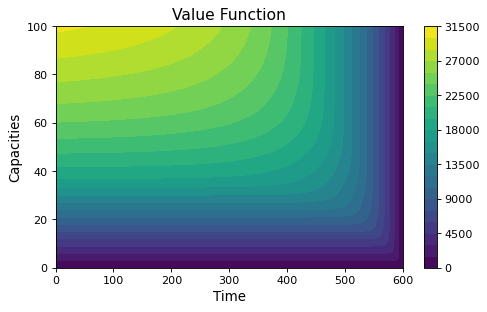

In [50]:
plotter(value_func, T, C, "Value Function")

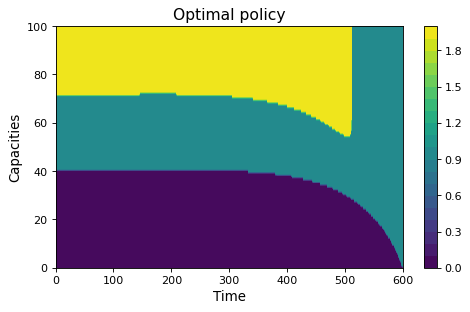

In [51]:
plotter(optimal_policy, T, C, "Optimal policy")

# Part C

In [65]:
def run_simulations(n_simulations, n_time_periods, f,u,v,T,C, price_not_down):
    
    simulation_profits = []
    simulation_actions = []
    simulation_capacities = []
    simulation_tickets = []
    n.random.seed(0)
    
    value_func, optimal_policy = revenue_mgmt(f,u,v,T,C, price_not_down)
    
    for simulation in range(n_simulations):
        rewards=n.zeros(n_time_periods)
        actions=n.zeros(n_time_periods)
        capacities=n.empty(n_time_periods)
        ticket_sold = n.zeros(n_time_periods)
        
        capacity_left = 100
        total_revenue = 0
        states = n.random.randint(0,C,size=n_time_periods)
        random_demand = n.random.choice(n.append(f,0), size=n_time_periods)
        
        for time in range(n_time_periods):
            if capacity_left <= 0:
                break
            action_class = optimal_policy[states[time],time]
            action = f[int(action_class)]
            actions[time] = action
            capacities[time] = capacity_left
            if random_demand[time] >= action:
                ticket_sold[time] = 1
                capacity_left -= 1
        rewards = n.dot(ticket_sold,actions)
        
        simulation_profits.append(n.sum(rewards))
        simulation_actions.append(actions)
        simulation_capacities.append(capacities)
        simulation_tickets.append(ticket_sold)
        
    return simulation_profits, simulation_actions, simulation_capacities, simulation_tickets

In [66]:
n_simulations = 1000
n_time_periods = T

simulation_profits, simulation_actions, simulation_capacities, simulation_tickets = run_simulations(n_simulations, 
                                                                                                    n_time_periods, 
                                                                                                    f,u,v,T,C, 
                                                                                                    price_not_down=False)
print(f"== simulation of {n_simulations} times ==")
print("Average profit: ", n.average(n.array(simulation_profits)))
print("Maximum profit: ", max(simulation_profits))
print("Maximum profit: ", min(simulation_profits))

== simulation of 1000 times ==
Average profit:  30005.0
Maximum profit:  33300.0
Maximum profit:  26300.0


In [67]:
print(simulation_profits[0])
print(simulation_actions[0][:10])
print(simulation_tickets[0][:10])
print(simulation_capacities[0][:10])

31300.0
[300. 300. 300. 300. 300. 500. 200. 500. 500. 200.]
[0. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
[100. 100. 100.  99.  99.  99.  99.  98.  98.  98.]


# Part D

In [38]:
value_func, optimal_policy = revenue_mgmt(f,u,v,T,C, price_not_down=True)
print("Expected Profit is : ",n.max(value_func))

Expected Profit is :  28982.404921941892


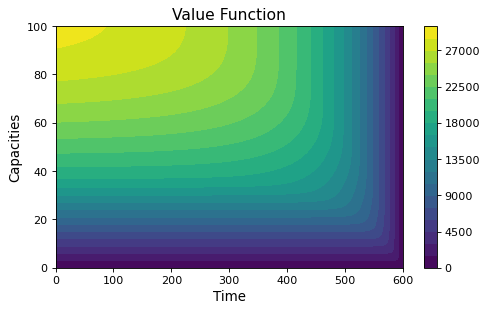

In [39]:
plotter(value_func, T, C, "Value Function")

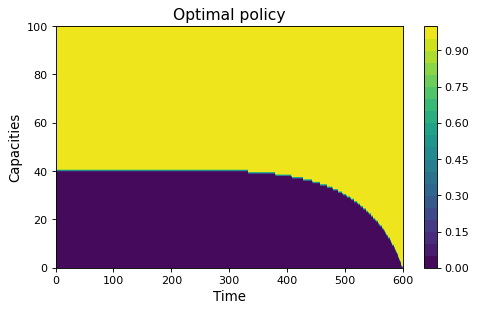

In [40]:
plotter(optimal_policy, T, C, "Optimal policy")

In [26]:
simulation_profits, simulation_actions, simulation_capacities, simulation_tickets = run_simulations(n_simulations, 
                                                                                                    n_time_periods, 
                                                                                                    f,u,v,T,C, 
                                                                                                    price_not_down=True)
print(f"== simulation of {n_simulations} times ==")
print("Average profit: ", n.average(n.array(simulation_profits)))
print("Maximum profit: ", max(simulation_profits))

== simulation of 1000 times ==
Average profit:  29256.4
Maximum profit:  32700.0
